# **Final Project Part 3 - Techinical Report**
Yapa M H I B Gunaratne (Hiran Gunaratne)

## **RECAP - Dataset Description**
As illustrated below, the dataset includes 12 varibles and 1 output. Variables consist of meteorological and other data collected on fires broke out. Output is the area of the fire represented in hectares. Detailed description of the variables are provided below.

   1. X - x-axis spatial coordinate within the Montesinho park map
   2. Y - y-axis spatial coordinate within the Montesinho park map 
   3. month - month of the year: 'jan' to 'dec' 
   4. day - day of the week: 'mon' to 'sun' 
   5. FFMC - FFMC index from the FWI system
   6. DMC - DMC index from the FWI system
   7. DC - DC index from the FWI system
   8. ISI - ISI index from the FWI system
   9. temp - temperature in Celsius degrees
   10. RH - relative humidity in %
   11. wind - wind speed in km/h
   12. rain - outside rain in mm/m2
   13. area - the burned area of the forest (in ha)

## **RECAP - Exploratory Data Analysis**

 - The dataset has **517 rows** with **13 attributes**.
 - The dataset **includes** both **numerical** and **non-numerical** feature variables. 
 - The non-numerical feature variables **'month'** and **'day'** can be **classified as 'Catogorical-Nominal'** in the contect of the planned prediction model.
 - The dataset **does not have any null values**.
 - All feature **varables excluding 'RH' and 'rain' have a positive correlation** whilst **'RH'** and **'rain'** have a **negative correlation** to the area of the forest fire. This can be considered a fare observation andboth 'RH' and 'rain' will limit the spread of forest fire.
 - Output variable **'area' seems to contain a couple of outliers** with values of over 600. These values may affect a generalised model. Hence it's sensible to exclude these outliers from the dataset
 - **'DC','RH','wind' and 'area'** seems to be slightly more **skewed compared to the rest** of the variables . These can be transformed to build an effective predictive model, **skeweness of the other variables are negligeable**
 - Variables **FFMC, DC, ISI, temp, RH, wind** and **rain** has a **notable linear relationship to the area** of forest fire. 
 - **No** clear indication of a **specific set of days** where **forest fires are more likely to occur**
 - The two **Catogorical-Nominal feature variables** need to be **dummy coded** to be used in building the predictive model
 - **Most normal** dummy variables **'month_aug'** and '**day_sun'** will be **dropped** from dummy_codes
 - **'month_sept'** and **'day_sat'** have a **notable positive correlation** whilst **'month_mar', 'day_fri,** and **'day_thu'** have a **notable negative correlation** to the area of the forest fire.
 


## **Model Building & Evaluation Approach**
 - Considering the results of the exploratory data analysis a **Linear Regression Model** will be built to predict the 'area' of forest fire
 - As there are a considerable amount of feature variables, **series of tests** will be done **evaluating the Mean Squared Error (MSE)** to determined the best set of feature variable to build the model
 - Considering the limited number of records for train-test split,  **K Fold Cross Validation** will be used to evaluate the model
 

## 1. **Preparing the Dataset**

### **1.1 Import Python Libraries & Generic Functions**

In [71]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
from sklearn import metrics 

plt.style.use('fivethirtyeight')

%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures

#Global settings 
use_original_columns = False
k_fold_value = 10
poly_degree_value = 2
poly_include_bias = False

In [72]:
#Generic Functions

def get_n_polynomial_features(poly_degree,xset,incl_bias):
    pf = PolynomialFeatures(degree=poly_degree, include_bias=incl_bias)
    X_poly = pf.fit_transform(xset)
    return pd.DataFrame(X_poly.tolist())

def linearRegression_npoly_KFold_Validation(poly_degree,xset,yset,kfold,incl_bias):
    from sklearn.model_selection import cross_val_score, KFold
    from sklearn.linear_model import LinearRegression
    
    kf_ff = KFold(n_splits=kfold, shuffle=True)
    pf = PolynomialFeatures(degree=poly_degree, include_bias=incl_bias)
    x_poly = pf.fit_transform(xset)    
    lr_ff = LinearRegression()
    print(poly_degree,np.mean(-cross_val_score(lr_ff, x_poly, yset, cv=kf_ff, scoring='neg_mean_squared_error')))

def linearRegression_KFold_Validation(xset,yset,kfold,title,return_test_score=False):
    #import LinearRegression model
    from sklearn.linear_model import LinearRegression
    # import model_selection
    from sklearn import model_selection

    # create an instance of model_selection with k-fold. ensure dataset is shuffled
    ten_fold = model_selection.KFold(n_splits=kfold, shuffle=True,random_state=100)


    train_mse_values = []
    test_mse_values = []
    train_scores = []
    test_scores = []

    n = 0

    for train_index, test_index in ten_fold.split(xset, yset):
        n += 1
        lr_ff = LinearRegression()
        lr_ff.fit(xset.iloc[train_index, :], yset.iloc[train_index]) #fit kth fold

        #predicting on training dataset
        yset_pred_train = lr_ff.predict(xset.iloc[train_index, :]) #predict on training dataset
        train_mse_values.append(metrics.mean_squared_error(yset.iloc[train_index],yset_pred_train)) #add train MSE to list
        train_scores.append(lr_ff.score(xset.iloc[train_index, :], yset.iloc[train_index])) #add train score to list

        #predicting on test dataset
        yset_pred_test = lr_ff.predict(xset.iloc[test_index, :]) #predict on test dataset
        test_mse_values.append(metrics.mean_squared_error(yset.iloc[test_index],yset_pred_test)) #add test MSE to list
        test_scores.append(lr_ff.score(xset.iloc[test_index, :], yset.iloc[test_index])) #add test score to list
        
    if return_test_score:
        return format(np.mean(test_scores))
    else:
        print('****Linear Regression - {} Fold CV - {} - Evauation Summary*****'.format(kfold,title))
        print(' ')
        print('Prediction on TRAINING dataset........ ') 
        print('Mean of MSE-TRAINSET for all folds: {}'.format(np.mean(train_mse_values)))
        print('Mean of SCORE-TRAINSET for all folds: {}'.format(np.mean(train_scores)))
        print(' ')
        print('Prediction on TEST dataset........') 
        print('Mean of MSE-TEST for all folds: {}'.format(np.mean(test_mse_values)))
        print('Mean of SCORE-TEST for all folds: {}'.format(np.mean(test_scores)))
        print('')
        print('')



### **1.2 Load Data to DataFrame**

In [73]:
DATA_DIR = Path('..','data')
file_path = DATA_DIR / 'forestfires.csv'
forest_fire = pd.read_csv(file_path)

In [74]:
# Quick check dataset 
forest_fire.shape

(517, 13)

In [75]:
forest_fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [76]:
forest_fire.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


### **1.3 Remove Outliers**
 - As per the EDA,output variable **'area'** seems to contain some **outliers with values of over 600**. These values may affect a generalised model. Hence it's sensible to exclude these outliers from the dataset
 - Further analysis on the dataset identified that **'area' of vast majority** of the records **is less than 100**. 
 - **Preliminary model evaluations indicated** that the **few records with 'area' > 100** were **effecting the accuracy** of a generalised model
 - Therefore records with **'area' > 100 were considered outliers**

In [77]:
# check no of records 
print('area > 600 :',forest_fire.loc[forest_fire.loc[:,'area']>600,:].shape)  #where area > 600
print('area > 100 :',forest_fire.loc[forest_fire.loc[:,'area']>100,:].shape)  #where area > 100
print('area < 100 :',forest_fire.loc[forest_fire.loc[:,'area']<100,:].shape)  #where area < 1
print('area = 0 :',forest_fire.loc[forest_fire.loc[:,'area']==0,:].shape)  # where area = 0    

area > 600 : (2, 13)
area > 100 : (11, 13)
area < 100 : (506, 13)
area = 0 : (247, 13)


In [78]:
# remove outliers in area variable
forest_fire = forest_fire.loc[forest_fire.loc[:,'area']<100,:]
forest_fire.shape


(506, 13)

### **1.4 Reduce the effect of Zero (0) values on output 'area'**
 - Detailed analysis of the dataset also revealed that **nearly 50%** of the records were **'area = 0'**, indicating area of the forest fires is negligeable.
 - Preliminary model evaluations incated that these high rate of 0 value was also affecting in generalise learning. 
 - Therefore, the **records with area > 0** were **duplicated to give more weight** to non-zero forest fire observations. 

In [79]:
#forest_fire = pd.concat([forest_fire,forest_fire.loc[(forest_fire.loc[:,'area']>0) & (forest_fire.loc[:,'area']<100) ,:]])
forest_fire = pd.concat([forest_fire,forest_fire.loc[(forest_fire.loc[:,'area']>0),:]])
forest_fire = pd.concat([forest_fire,forest_fire.loc[(forest_fire.loc[:,'area']>0),:]])
forest_fire = pd.concat([forest_fire,forest_fire.loc[(forest_fire.loc[:,'area']>0),:]])
forest_fire = pd.concat([forest_fire,forest_fire.loc[(forest_fire.loc[:,'area']>0),:]])
forest_fire = pd.concat([forest_fire,forest_fire.loc[(forest_fire.loc[:,'area']>0),:]])
forest_fire = pd.concat([forest_fire,forest_fire.loc[(forest_fire.loc[:,'area']>0),:]])
forest_fire = pd.concat([forest_fire,forest_fire.loc[(forest_fire.loc[:,'area']>0),:]])
forest_fire = pd.concat([forest_fire,forest_fire.loc[(forest_fire.loc[:,'area']>0),:]])
forest_fire = pd.concat([forest_fire,forest_fire.loc[(forest_fire.loc[:,'area']>0),:]])
forest_fire = pd.concat([forest_fire,forest_fire.loc[(forest_fire.loc[:,'area']>0),:]])
print(forest_fire.shape)
print('area = 0 :',forest_fire.loc[forest_fire.loc[:,'area']==0,:].shape)  # where area = 0
print('area > 10 :',forest_fire.loc[forest_fire.loc[:,'area']>0,:].shape)  # where area > 0

(265463, 13)
area = 0 : (247, 13)
area > 10 : (265216, 13)


### **1.5 Re-Checking the Distribution of Dataset**

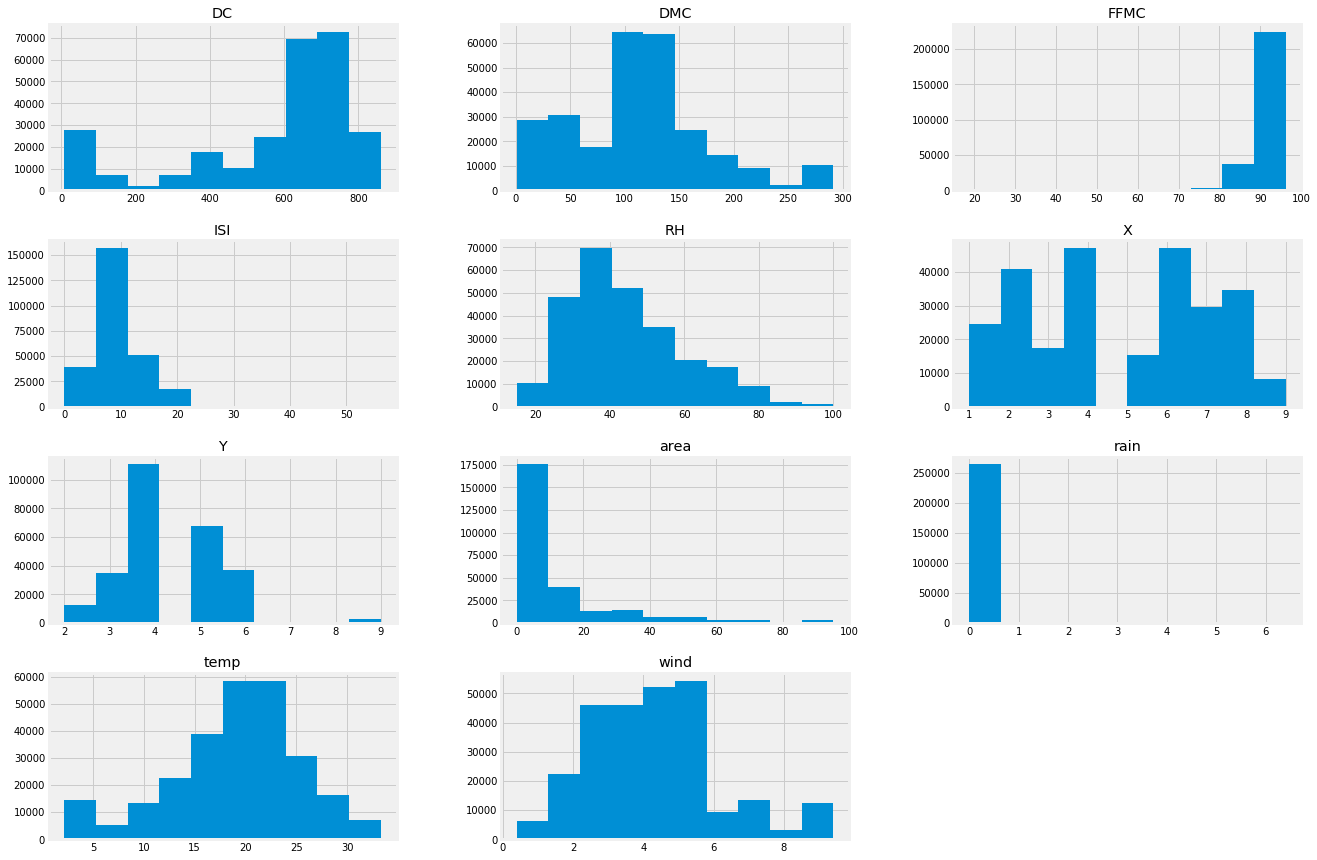

In [80]:
# Determining the distribution of the data 
axes = forest_fire.hist(figsize=(20, 15))

In [81]:
# view measures of central tendency of the dataset 
list_of_stats_list = [['Variable','Mean','Median','Mode']]

for v in ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']:
    list_of_stats_list.append([v,forest_fire.loc[:,v].mean(),forest_fire.loc[:,v].median(),forest_fire.loc[:,v].mode()[0]])

headers = list_of_stats_list.pop(0)
central_tendency = pd.DataFrame(list_of_stats_list, columns=headers)    

central_tendency    

,Variable,Mean,Median,Mode
0,X,4.775822,5.00,4.00
1,Y,4.366665,4.00,4.00
2,FFMC,91.020489,91.70,92.10
3,DMC,113.446208,111.20,99.00
4,DC,567.414893,664.50,745.30
5,ISI,9.218577,8.40,9.60
6,temp,19.201596,20.10,4.60
7,RH,43.969973,41.00,39.00
8,wind,4.136086,4.00,4.00
9,rain,0.030101,0.00,0.00


### **1.6 Transforming Skewed Variables**

**'X', 'DMC', 'DC', 'temp','RH' and 'area'** seems to be slightly more **skewed compared to the rest** of the variables . These can be transformed to build an effective predictive model, **skeweness of the other variables are negligeable**

 **Logarithm transfromation** is applied on **'X', 'DMC', 'DC', 'temp' and'RH'**  skewness

Since **'area'** include a considerable amout of zero ('0') values, it **is transformed with a x = (x+1) function**, before the **logarithm transformation is applied** to overcome its right skewness

In [82]:
forest_fire['X_log'] = np.log(forest_fire['X']) # logarithm of X
forest_fire['DMC_log'] = np.log(forest_fire['DMC']) # logarithm of DMC
forest_fire['DC_log'] = np.log(forest_fire['DC']) # logarithm of DC
forest_fire['temp_log'] = np.log(forest_fire['temp']) # logarithm of temp
forest_fire['RH_log'] = np.log(forest_fire['RH']) # logarithm of RH

f_crt = lambda x: np.sign(x) * np.power(abs(x), 1./3) # define lambda function to get the cube root 
f_x1 = lambda x: x + 1 # define lambda function to get rid of the 0's in area
f_x10 = lambda x: x + 10 # define lambda function to get rid of the 0's in area

#forest_fire['area_cbrt'] = forest_fire.loc[:,['area']].applymap(f_crt)
#forest_fire['area_x_plus_1_cbrt'] = forest_fire.loc[:,['area']].applymap(f_x1).applymap(f_crt)
#forest_fire['area_x_plus_10_cbrt'] = forest_fire.loc[:,['area']].applymap(f_x10).applymap(f_crt)
#forest_fire['area_x_plus_1_log'] = np.log(forest_fire.loc[:,['area']].applymap(f_x1)) # logarith of wind
forest_fire['area_x_plus_10_log'] = np.log(forest_fire.loc[:,['area']].applymap(f_x10)) # logarith of wind

forest_fire.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,X_log,DMC_log,DC_log,temp_log,RH_log,area_x_plus_10_log
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,1.609438,5.117395,6.623534,3.049273,4.262680,2.498974
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,1.791759,5.117395,6.623534,2.901422,4.127134,2.344686
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1.386294,4.037774,6.500689,3.325036,3.465736,2.799717
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.693147,4.037774,6.500689,3.086487,4.262680,4.163404
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1.945910,4.037774,6.500689,3.054001,4.248495,3.052113


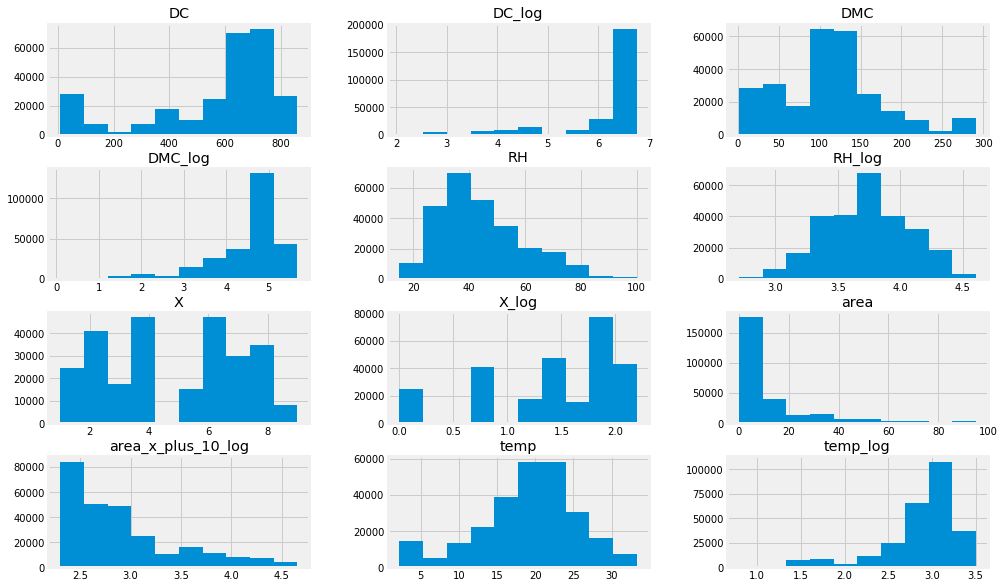

In [83]:
# Checking the distribution of the data after transfromation
transformed_variables = ['X','X_log','DMC','DMC_log','DC','DC_log','temp','temp_log','RH','RH_log','area','area_x_plus_10_log']
axes = forest_fire.loc[:,transformed_variables].hist(figsize=(15, 10))

In [84]:
# view measures of central tendency of the dataset 
list_of_stats_list = [['Variable','Mean','Median','Mode']]

for v in transformed_variables:
    list_of_stats_list.append([v,forest_fire.loc[:,v].mean(),forest_fire.loc[:,v].median(),forest_fire.loc[:,v].mode()[0]])

headers = list_of_stats_list.pop(0)
central_tendency = pd.DataFrame(list_of_stats_list, columns=headers)    

central_tendency    

,Variable,Mean,Median,Mode
0,X,4.775822,5.000000,4.000000
1,X_log,1.395497,1.609438,1.386294
2,DMC,113.446208,111.200000,99.000000
3,DMC_log,4.500459,4.711330,4.595120
4,DC,567.414893,664.500000,745.300000
5,DC_log,6.116590,6.499035,6.613787
6,temp,19.201596,20.100000,4.600000
7,temp_log,2.878708,3.000720,1.526056
8,RH,43.969973,41.000000,39.000000
9,RH_log,3.725159,3.713572,3.663562


**Observation**

Transformation have been able to providea better central tendency for all transformed variables and also reduce the skewness

**Action**

In [85]:
# select feature variables for the models
if use_original_columns:
    v_X = 'X'
    v_DMC = 'DMC'
    v_DC = 'DC'
    v_temp = 'temp'
    v_RH = 'RH'
    v_area = 'area'
else:
    v_X = 'X_log'
    v_DMC = 'DMC_log'
    v_DC = 'DC_log'
    v_temp = 'temp_log'
    v_RH = 'RH_log'
    v_area = 'area_x_plus_10_log'

forest_fire = forest_fire.loc[:,[v_X,'Y','month','day','FFMC',v_DMC,v_DC,'ISI',v_temp,v_RH,'wind','rain',v_area]]
forest_fire.head()

,X_log,Y,month,day,FFMC,DMC_log,DC_log,ISI,temp_log,RH_log,wind,rain,area_x_plus_10_log
0,1.945910,5,mar,fri,86.2,3.265759,4.546481,5.1,2.104134,3.931826,6.7,0.0,2.302585
1,1.945910,4,oct,tue,90.6,3.566712,6.505934,6.7,2.890372,3.496508,0.9,0.0,2.302585
2,1.945910,4,oct,sat,90.6,3.777348,6.532189,6.7,2.681022,3.496508,1.3,0.0,2.302585
3,2.079442,6,mar,fri,91.7,3.505557,4.350278,9.0,2.116256,4.574711,4.0,0.2,2.302585
4,2.079442,6,mar,sun,89.3,3.937691,4.626932,9.6,2.433613,4.595120,1.8,0.0,2.302585


### **1.7 Dummy Code Non-numerical Variables**
The dataset **includes** both **numerical** and **non-numerical** feature variables.

The non-numerical feature variables **'month'** and **'day'** can be **classified as 'Catogorical-Nominal'** in the contect of the planned prediction model.

In [86]:
# view caegory counts of month variable to decide on which category to drop when dummy coding
forest_fire.loc[:,'month'].value_counts()

aug    97365
sep    93259
mar    19491
jul    17422
feb    10250
dec     9216
jun     8201
oct     5130
apr     4101
may     1025
jan        2
nov        1
Name: month, dtype: int64

In [87]:
# view caegory counts of day variable to decide on which category to drop when dummy coding
forest_fire.loc[:,'day'].value_counts()

sun    47152
fri    44074
sat    38954
mon    38947
tue    33820
wed    31766
thu    30750
Name: day, dtype: int64

In [88]:
# Dummy coding month & day
forest_fire = pd.get_dummies(forest_fire, columns=['month','day'])
forest_fire.head()

,X_log,Y,FFMC,DMC_log,DC_log,ISI,temp_log,RH_log,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,1.945910,5,86.2,3.265759,4.546481,5.1,2.104134,3.931826,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,1.945910,4,90.6,3.566712,6.505934,6.7,2.890372,3.496508,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,1.945910,4,90.6,3.777348,6.532189,6.7,2.681022,3.496508,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,2.079442,6,91.7,3.505557,4.350278,9.0,2.116256,4.574711,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,2.079442,6,89.3,3.937691,4.626932,9.6,2.433613,4.595120,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


As per the EDA Most **normal value** for **month is 'aug'** and **day is 'sun'**. Therefore these columns will be dropped.

In [89]:
# Drop dummy coded columns for'aug'and 'sun'
forest_fire = forest_fire.drop(['month_aug','day_sun'], axis='columns')
forest_fire.head()

,X_log,Y,FFMC,DMC_log,DC_log,ISI,temp_log,RH_log,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_thu,day_tue,day_wed
0,1.945910,5,86.2,3.265759,4.546481,5.1,2.104134,3.931826,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,1.945910,4,90.6,3.566712,6.505934,6.7,2.890372,3.496508,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,1.945910,4,90.6,3.777348,6.532189,6.7,2.681022,3.496508,1.3,0.0,...,0,0,1,0,0,0,1,0,0,0
3,2.079442,6,91.7,3.505557,4.350278,9.0,2.116256,4.574711,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,2.079442,6,89.3,3.937691,4.626932,9.6,2.433613,4.595120,1.8,0.0,...,0,0,0,0,0,0,0,0,0,0


## **2 MSE of Null Model Predicting the Mean of 'area'**

In [90]:
# Define features and the output
feature_variables = list(forest_fire)
feature_variables.remove(v_area)
X = forest_fire.loc[:,feature_variables] 
y = forest_fire.loc[:, v_area]

In [91]:
X.head()

,X_log,Y,FFMC,DMC_log,DC_log,ISI,temp_log,RH_log,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_thu,day_tue,day_wed
0,1.945910,5,86.2,3.265759,4.546481,5.1,2.104134,3.931826,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,1.945910,4,90.6,3.566712,6.505934,6.7,2.890372,3.496508,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,1.945910,4,90.6,3.777348,6.532189,6.7,2.681022,3.496508,1.3,0.0,...,0,0,1,0,0,0,1,0,0,0
3,2.079442,6,91.7,3.505557,4.350278,9.0,2.116256,4.574711,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,2.079442,6,89.3,3.937691,4.626932,9.6,2.433613,4.595120,1.8,0.0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
y.head()

0    2.302585
1    2.302585
2    2.302585
3    2.302585
4    2.302585
Name: area_x_plus_10_log, dtype: float64

In [93]:
# Create an array with the same shape as y and then fill it in the the mean value 
null_pred = np.zeros(y.shape)
null_pred += np.mean(y)
print('Mean Value:', null_pred[0], ' Length:', null_pred.size)

Mean Value: 2.918645075701758  Length: 265463


In [94]:
# Calculate MSE of null model
print('MSE of the null modell is :',metrics.mean_squared_error(null_pred, y))

MSE of the null modell is : 0.3034685858626112


## **3. MSE of Model Using All Feature Variables & K-Fold Cross Validation**

In [95]:
linearRegression_KFold_Validation(X,y,k_fold_value,'ALL FEATURES')

****Linear Regression - 10 Fold CV - ALL FEATURES - Evauation Summary*****
 
Prediction on TRAINING dataset........ 
Mean of MSE-TRAINSET for all folds: 0.27398161554850897
Mean of SCORE-TRAINSET for all folds: 0.09716613415813412
 
Prediction on TEST dataset........
Mean of MSE-TEST for all folds: 0.27404264224636943
Mean of SCORE-TEST for all folds: 0.09693824698839955




**Observation**
 - Although the results is better than the null model, accuracy of the test dataset predictions is lower than the accuracy of traning dataset predictions. Also, the average predicted value are far from the actual values
 - This is an indication of **High Variance** causing **overfitting**. There seems to be **random noise present** in the training data.

**Action**
- Since the size of the dataset is limited, reducing the number of features may help to overcome high variance

## 4 **Feature Selection to Reduce High Variance**

### **4.1 Using Correlation to Identify Feature Variables**

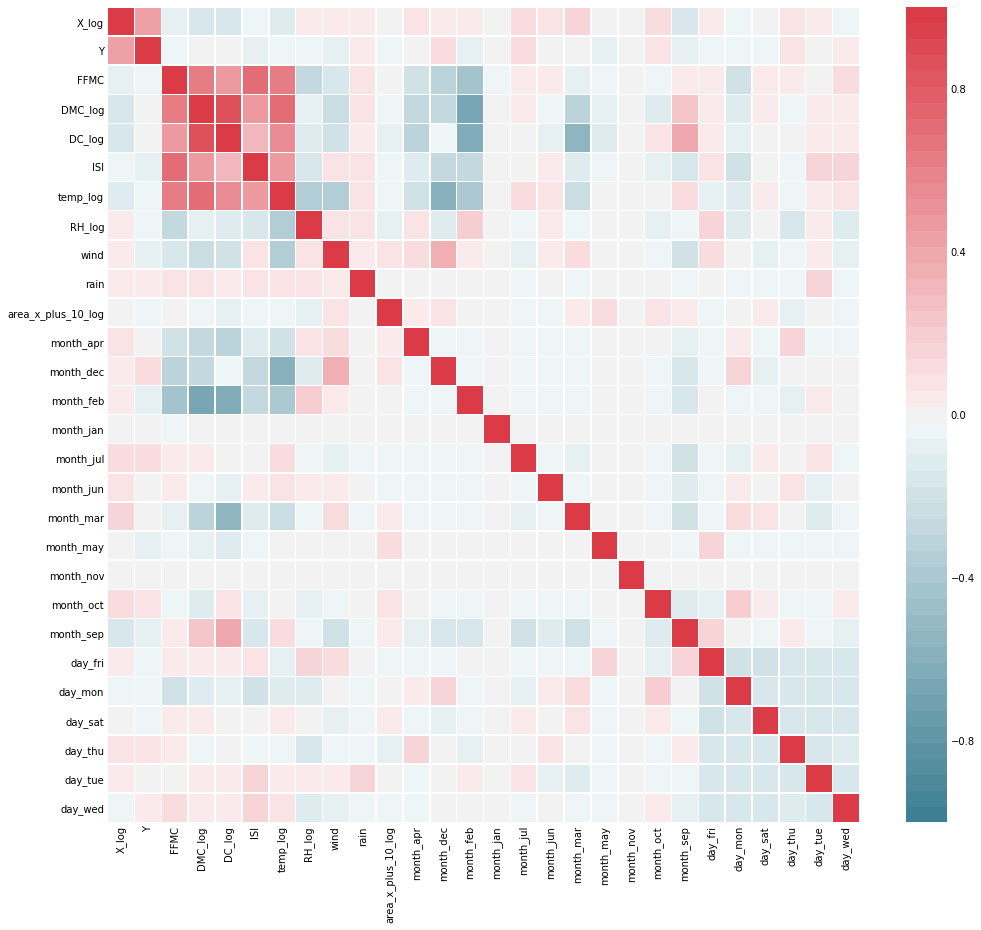

In [96]:
# Heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(15,15))         
sns.heatmap(forest_fire.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=51), linewidths=.5, ax=ax);

In [97]:
forest_fire.corr()

,X_log,Y,FFMC,DMC_log,DC_log,ISI,temp_log,RH_log,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_thu,day_tue,day_wed
X_log,1.000000,0.423140,-0.071198,-0.171236,-0.175297,-0.049073,-0.131278,0.052531,0.055848,0.056899,...,-0.000858,0.001204,0.107961,-0.152862,0.023821,-0.022189,-0.011018,0.079528,0.020598,-0.029370
Y,0.423140,1.000000,-0.026587,0.011961,0.018775,-0.089625,-0.020401,-0.023546,-0.075222,0.029727,...,-0.075017,-0.002342,0.078254,-0.095538,-0.052882,-0.028205,-0.047449,0.095686,0.019266,0.027632
FFMC,-0.071198,-0.026587,1.000000,0.643372,0.480205,0.703004,0.610292,-0.269076,-0.163932,0.082463,...,-0.023685,-0.005970,-0.035956,0.046070,0.047028,-0.181347,0.058339,0.035120,0.016100,0.110396
DMC_log,-0.171236,0.011961,0.643372,1.000000,0.845461,0.456299,0.687183,-0.083884,-0.220917,0.061472,...,-0.095480,-0.008001,-0.130525,0.231608,0.022266,-0.124445,0.035496,-0.030019,0.043446,0.024497
DC_log,-0.175297,0.018775,0.480205,0.845461,1.000000,0.329484,0.564698,-0.117042,-0.197071,0.034394,...,-0.126959,-0.003152,0.064677,0.407226,0.045006,-0.083738,-0.013531,-0.008833,0.038292,0.045390
ISI,-0.049073,-0.089625,0.703004,0.456299,0.329484,1.000000,0.465455,-0.148839,0.064294,0.067083,...,-0.052311,-0.003760,-0.060281,-0.145618,0.070006,-0.205461,0.001164,-0.049113,0.152361,0.137721
temp_log,-0.131278,-0.020401,0.610292,0.687183,0.564698,0.465455,1.000000,-0.368998,-0.359017,0.064341,...,0.001585,-0.001810,0.004681,0.123881,-0.076667,-0.133278,0.047970,-0.022925,0.032566,0.093358
RH_log,0.052531,-0.023546,-0.269076,-0.083884,-0.117042,-0.148839,-0.368998,1.000000,0.095880,0.095154,...,-0.006441,-0.001650,-0.060585,-0.042947,0.162962,-0.104277,0.000419,-0.152906,0.039531,-0.126170
wind,0.055848,-0.075222,-0.163932,-0.220917,-0.197071,0.064294,-0.359017,0.095880,1.000000,0.048774,...,-0.004433,0.000372,-0.035234,-0.198395,0.101857,-0.000578,-0.061917,-0.055219,0.035433,-0.092097
rain,0.056899,0.029727,0.082463,0.061472,0.034394,0.067083,0.064341,0.095154,0.048774,1.000000,...,-0.004618,-0.000144,-0.010413,-0.054588,0.002673,-0.030758,-0.030762,-0.026849,0.154179,-0.027343


### **4.1.1 MSE of Model Using Most Correlated Feature Variables & K-Fold Cross Validation**

Preliminary testing identified that correlation **threshold 0.3 provided the best split**

In [98]:
corr_threshold = 0.03

In [99]:
# Create correlation matrix
corr_matrix = forest_fire.corr().abs()

#Get correlation to area
cm_area_most = corr_matrix[v_area]

cm_area_most = cm_area_most[cm_area_most>corr_threshold]
cm_area_most = cm_area_most [cm_area_most!=1]
cm_area_most

DMC_log      0.045054
DC_log       0.059389
ISI          0.049487
temp_log     0.044284
RH_log       0.068848
wind         0.085665
month_apr    0.051175
month_dec    0.068038
month_jul    0.058659
month_mar    0.035316
month_may    0.108605
month_oct    0.088671
month_sep    0.047668
day_fri      0.031321
day_sat      0.044104
day_thu      0.067400
day_wed      0.041958
Name: area_x_plus_10_log, dtype: float64

In [100]:
X_corr_high = forest_fire.loc[:,cm_area_most.index] 
X_corr_high.head()

,DMC_log,DC_log,ISI,temp_log,RH_log,wind,month_apr,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,day_fri,day_sat,day_thu,day_wed
0,3.265759,4.546481,5.1,2.104134,3.931826,6.7,0,0,0,1,0,0,0,1,0,0,0
1,3.566712,6.505934,6.7,2.890372,3.496508,0.9,0,0,0,0,0,1,0,0,0,0,0
2,3.777348,6.532189,6.7,2.681022,3.496508,1.3,0,0,0,0,0,1,0,0,1,0,0
3,3.505557,4.350278,9.0,2.116256,4.574711,4.0,0,0,0,1,0,0,0,1,0,0,0
4,3.937691,4.626932,9.6,2.433613,4.595120,1.8,0,0,0,1,0,0,0,0,0,0,0


In [101]:
linearRegression_KFold_Validation(X_corr_high,y,k_fold_value,'MOST CORRELATED')

****Linear Regression - 10 Fold CV - MOST CORRELATED - Evauation Summary*****
 
Prediction on TRAINING dataset........ 
Mean of MSE-TRAINSET for all folds: 0.27864930282340555
Mean of SCORE-TRAINSET for all folds: 0.0817850027780763
 
Prediction on TEST dataset........
Mean of MSE-TEST for all folds: 0.27869037010381287
Mean of SCORE-TEST for all folds: 0.08162198746193845




### **4.1.2 MSE of Model Using Least Correlated Feature Variables & K-Fold Cross Validation**

In [102]:
# Create correlation matrix
corr_matrix = forest_fire.corr().abs()

#Get correlation to area 
cm_area_least = corr_matrix[v_area]

cm_area_least = cm_area_least[cm_area_least<corr_threshold]
cm_area_least

X_log        0.004052
Y            0.025927
FFMC         0.019590
rain         0.002777
month_feb    0.019454
month_jan    0.003070
month_jun    0.024375
month_nov    0.002171
day_mon      0.012356
day_tue      0.011815
Name: area_x_plus_10_log, dtype: float64

In [103]:
X_corr_low = forest_fire.loc[:,cm_area_least.index] 
X_corr_low.head()

,X_log,Y,FFMC,rain,month_feb,month_jan,month_jun,month_nov,day_mon,day_tue
0,1.945910,5,86.2,0.0,0,0,0,0,0,0
1,1.945910,4,90.6,0.0,0,0,0,0,0,1
2,1.945910,4,90.6,0.0,0,0,0,0,0,0
3,2.079442,6,91.7,0.2,0,0,0,0,0,0
4,2.079442,6,89.3,0.0,0,0,0,0,0,0


In [104]:
linearRegression_KFold_Validation(X_corr_low,y,k_fold_value,'LEAST CORRELATED')

****Linear Regression - 10 Fold CV - LEAST CORRELATED - Evauation Summary*****
 
Prediction on TRAINING dataset........ 
Mean of MSE-TRAINSET for all folds: 0.3027537600040472
Mean of SCORE-TRAINSET for all folds: 0.0023551791733439687
 
Prediction on TEST dataset........
Mean of MSE-TEST for all folds: 0.3027741385031722
Mean of SCORE-TEST for all folds: 0.0022610154689175375




**Observation**
- Although there is a slight improvement in the test dataset prediction performance feature selection basedon correlation has not helped to build a better model

**Action**
- Use VarianceTheshold for feature selection

### **4.2 Using VarianceThreshold to Identify Feature Variables - Threshold = 1**

In [105]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(1)
selector.fit(X)
X_vt_1 = X[X.columns[selector.get_support(indices=True)]]
X_vt_1.head()

,Y,FFMC,ISI,wind
0,5,86.2,5.1,6.7
1,4,90.6,6.7,0.9
2,4,90.6,6.7,1.3
3,6,91.7,9.0,4.0
4,6,89.3,9.6,1.8


### **4.2.1 MSE of Model Using Features Selected by VarianceThreshold (Theshold= 1) & K-Fold Cross Validation**

In [106]:
linearRegression_KFold_Validation(X_vt_1,y,k_fold_value,'VARIANCE-THRESHOLD = 1')

****Linear Regression - 10 Fold CV - VARIANCE-THRESHOLD = 1 - Evauation Summary*****
 
Prediction on TRAINING dataset........ 
Mean of MSE-TRAINSET for all folds: 0.29936187221198696
Mean of SCORE-TRAINSET for all folds: 0.01353222215074582
 
Prediction on TEST dataset........
Mean of MSE-TEST for all folds: 0.2993735933289065
Mean of SCORE-TEST for all folds: 0.013464806141147933




### **4.3 Using Manual Feature Variables Selection**

In [107]:
X_manual = forest_fire.loc[:,[v_temp,v_RH,'rain','wind']] 
X_manual.head()

,temp_log,RH_log,rain,wind
0,2.104134,3.931826,0.0,6.7
1,2.890372,3.496508,0.0,0.9
2,2.681022,3.496508,0.0,1.3
3,2.116256,4.574711,0.2,4.0
4,2.433613,4.595120,0.0,1.8


### **4.3.1 MSE of Model Using Features Selected Manually & K-Fold Cross Validation**

In [108]:
linearRegression_KFold_Validation(X_manual,y,k_fold_value,'MANUAL')

****Linear Regression - 10 Fold CV - MANUAL - Evauation Summary*****
 
Prediction on TRAINING dataset........ 
Mean of MSE-TRAINSET for all folds: 0.29875480518713976
Mean of SCORE-TRAINSET for all folds: 0.015532704181309953
 
Prediction on TEST dataset........
Mean of MSE-TEST for all folds: 0.2987651768364936
Mean of SCORE-TEST for all folds: 0.015474053615619977




### **4.4 Conclusion - Feature Selection to Reduce High Variance**

**Summary of Test Results**

In [109]:
# Calculate MSE of null model
print('MSE of the null modell is :',metrics.mean_squared_error(null_pred, y))
print('')
print('')
linearRegression_KFold_Validation(X,y,k_fold_value,'ALL FEATURES')
linearRegression_KFold_Validation(X_corr_high,y,k_fold_value,'MOST CORRELATED')
linearRegression_KFold_Validation(X_corr_low,y,k_fold_value,'LEAST CORRELATED')
linearRegression_KFold_Validation(X_vt_1,y,k_fold_value,'VARIANCE-THRESHOLD = 1')
linearRegression_KFold_Validation(X_manual,y,k_fold_value,'MANUAL')

MSE of the null modell is : 0.3034685858626112


****Linear Regression - 10 Fold CV - ALL FEATURES - Evauation Summary*****
 
Prediction on TRAINING dataset........ 
Mean of MSE-TRAINSET for all folds: 0.27398161554850897
Mean of SCORE-TRAINSET for all folds: 0.09716613415813412
 
Prediction on TEST dataset........
Mean of MSE-TEST for all folds: 0.27404264224636943
Mean of SCORE-TEST for all folds: 0.09693824698839955


****Linear Regression - 10 Fold CV - MOST CORRELATED - Evauation Summary*****
 
Prediction on TRAINING dataset........ 
Mean of MSE-TRAINSET for all folds: 0.27864930282340555
Mean of SCORE-TRAINSET for all folds: 0.0817850027780763
 
Prediction on TEST dataset........
Mean of MSE-TEST for all folds: 0.27869037010381287
Mean of SCORE-TEST for all folds: 0.08162198746193845


****Linear Regression - 10 Fold CV - LEAST CORRELATED - Evauation Summary*****
 
Prediction on TRAINING dataset........ 
Mean of MSE-TRAINSET for all folds: 0.3027537600040472
Mean of SCORE-TRAINSE

**Conclusion**

 - Feature selection based on Correlation, VarianceTreshold & Manual has helped to reduce the variance slighty.
 - Although the Variance is reduced,there is still low accuracy on predictions. Difference between MSE on train dataset and test dataset is very low. This is an indication of High Bias

**Actions**
 - Use Feature Engineering to reduce Bias
 - Create different models for feature sets selected by Correlation, VarianceTreshold & Manual 

## **5 Feature Engineering to Reduce High Bias**

### **5.1 Using Polinomial Features on ALL FEATURE VARIABLE SET**

In [120]:
#checking test scores on a range of degrees
for degree in range(1,4):
	print(degree,linearRegression_KFold_Validation(get_n_polynomial_features(degree,X,poly_include_bias),y,k_fold_value,'ALL FEATURES',True))

1 0.09693824698839955
2 0.7555278865486496


MemoryError: 

In [123]:
# checking the scores on chosen degree
linearRegression_KFold_Validation(get_n_polynomial_features(2,X,poly_include_bias),y,k_fold_value,'ALL FEATURES')

****Linear Regression - 10 Fold CV - ALL FEATURES - Evauation Summary*****
 
Prediction on TRAINING dataset........ 
Mean of MSE-TRAINSET for all folds: 0.05117725685874612
Mean of SCORE-TRAINSET for all folds: 0.8313581930972498
 
Prediction on TEST dataset........
Mean of MSE-TEST for all folds: 0.07425643245448303
Mean of SCORE-TEST for all folds: 0.7555278865486496




**Observation**
 - Testing beyond degree = 2 is not practically possibledue to PC resource limitations
 - However, best results seems to be in the model built with degree = 2

### **5.2 Using Polinomial Features on MOST CORRELATED FEATURE VARIABLE SET**

In [119]:
#checking test scores on a range of degrees
for degree in range(1,4):
	print(degree,linearRegression_KFold_Validation(get_n_polynomial_features(degree,X_corr_high,poly_include_bias),y,k_fold_value,'MOST CORRELATED',True))

1 0.08162198746193845
2 0.47639200905866447
3 -190.65398086402644


MemoryError: 

In [113]:
# checking the scores on chosen degree
linearRegression_KFold_Validation(get_n_polynomial_features(2,X_corr_high,poly_include_bias),y,k_fold_value,'MOST CORRELATED')

****Linear Regression - 10 Fold CV - MOST CORRELATED - Evauation Summary*****
 
Prediction on TRAINING dataset........ 
Mean of MSE-TRAINSET for all folds: 0.15718095127215603
Mean of SCORE-TRAINSET for all folds: 0.482051553169551
 
Prediction on TEST dataset........
Mean of MSE-TEST for all folds: 0.15886964400140985
Mean of SCORE-TEST for all folds: 0.47639200905866447




**Observation**
 - Best results seems to be in the model built with degree = 2. 
 - This is a considerable improvement to the same model built without polinomial features

### **5.3 Using Polinomial Features on FEATURE VARIABLE SET SELECTED BY VARIANCE-THRESHOLD = 1**

In [114]:
#checking test scores on a range of degrees
for degree in range(1,9):
	print(degree,linearRegression_KFold_Validation(get_n_polynomial_features(degree,X_vt_1,poly_include_bias),y,k_fold_value,'VARIANCE-THRESHOLD = 1',True))

1 0.013464806141147933
2 0.04146915244266107
3 0.09906340369930414
4 -42.06480585642988
5 -22859.750644981243
6 -2173013.2849481707
7 -45925066.966681175
8 -49306241124.5746


In [115]:
# checking the scores on chosen degree
linearRegression_KFold_Validation(get_n_polynomial_features(2,X_vt_1,poly_include_bias),y,k_fold_value,'VARIANCE-THRESHOLD = 1')

****Linear Regression - 10 Fold CV - VARIANCE-THRESHOLD = 1 - Evauation Summary*****
 
Prediction on TRAINING dataset........ 
Mean of MSE-TRAINSET for all folds: 0.29083016378092624
Mean of SCORE-TRAINSET for all folds: 0.04164605573948116
 
Prediction on TEST dataset........
Mean of MSE-TEST for all folds: 0.29087182828175884
Mean of SCORE-TEST for all folds: 0.04146915244266107




**Observation**
 - Best results seems to be in the model built with degree = 2. 
 - This is a considerable improvement to the same model built without polinomial features

### **5.4 Using Polinomial Features on MANUALLY SELECTED FEATURE VARIABLE SET**

In [116]:
#checking test scores on a range of degrees
for degree in range(1,9):
	print(degree,linearRegression_KFold_Validation(get_n_polynomial_features(degree,X_manual,poly_include_bias),y,k_fold_value,'MANUAL',True))

1 0.015474053615619977
2 0.04648685690937816
3 0.06108833786702143
4 0.13967399448564527
5 0.1961420189697699
6 0.21281612665238042
7 -2019211273.056614
8 -948591536719.9014


In [117]:
# checking the scores on chosen degree
linearRegression_KFold_Validation(get_n_polynomial_features(5,X_manual,poly_include_bias),y,k_fold_value,'MANUAL')

****Linear Regression - 10 Fold CV - MANUAL - Evauation Summary*****
 
Prediction on TRAINING dataset........ 
Mean of MSE-TRAINSET for all folds: 0.24041724727276598
Mean of SCORE-TRAINSET for all folds: 0.2077691474340635
 
Prediction on TEST dataset........
Mean of MSE-TEST for all folds: 0.24398211908437167
Mean of SCORE-TEST for all folds: 0.1961420189697699




**Observation**
 - Best results seems to be in the model built with degree = 5. 
 - This is a considerable improvement to the same model built without polinomial features

In [118]:
#for degree in range(1, 11):
#    linearRegression_npoly_KFold_Validation(degree,X_manual,y,k_fold_value,poly_include_bias)

## **6 Conclusion**

### **Summary**
- The limited number of records and very un-even spread in the dataset resulted low accuracy scores in the early stage of the model building
- Below actions helped to over come theses challeges
     1. Remove outliers where area > 100
     2. Duplicate the records with area > 0 to give them a more weightin thelearning proecess
     3. Apply Log transformation on highly skewed feature variable
     4. Apply x = x+10 and log transformation on output variable to reduce skewness
     5. 10-Fold Cross Valiation to evalate the accuracy
          
- Multiple Linear Regression Models were built using following different feature selection methods to reduce High Variance
     1. Correlation
     2. Variance Threshold
     3. Manual Feature Selection based on general knowledge
 
- Polynomial Terms of various degree were applied on each above resulting model to reduce High Bias
 
- The Linear Regression Model built using the following feature seletion & feature engineering options respectively showed the best results subjected to the limited resources an time avalable
     1. All feature varibles
     2. Polinomial term of degree = 2 
     
### **Future Work** 
  - Gather more data to build more acurate Linear Regression Models
  - Use different Machine Learning Techniques to compare and identify best options. e.g. ensemples, random forest, logistic regression etc.
 